# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# importing the necessary packages & the training dataset
!pip install pandas
import pandas as pd
train_data = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews','text'])
train_data[['reviews','text']] = train_data['reviews'].str.split(" ", n=1, expand=True)
train_data.head()

<ipython-input-1-c5260b842031>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['reviews','text'])


,reviews,text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [ ]:
test_data = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews','text'])
test_data[['reviews','text']] = test_data['reviews'].str.split(" ", n=1, expand=True)
test_data.head()

<ipython-input-2-f405f2f705d2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['reviews','text'])


,reviews,text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the eag..."
2,0,"gangs of new york is an unapologetic mess , wh..."
3,0,"we never really feel involved with the story ,..."
4,1,this is one of polanski 's best films .


In [ ]:
# importing packages necessary for further processing & data cleaning
import numpy as np
import pandas as pd
import string
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
def clean_text(text):
# Remove text in square brackets,links,Make text lowercase, punctuations, numbers
    cleaned_text = text.lower()
    cleaned_text = cleaned_text.split('[')[0]
    words = cleaned_text.split()
    cleaned_text = ' '.join(word for word in words if not word.startswith('http'))
    cleaned_text = ''.join(char for char in cleaned_text if char not in string.punctuation)
    words = cleaned_text.split()
    cleaned_text = ' '.join(word for word in words if not any(char.isdigit() for char in word))

    return cleaned_text

# Assuming 'train_data' is your DataFrame and 'text_column' is the column containing text data
train_data['cleaned_text'] = train_data['text'].apply(clean_text)
train_data.head()


,reviews,text,cleaned_text
0,1,"a stirring , funny and finally transporting re...",a stirring funny and finally transporting reim...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled from the cuttingroom fl...
2,0,they presume their audience wo n't sit still f...,they presume their audience wo nt sit still fo...
3,1,this is a visually stunning rumination on love...,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby should have been th...


In [ ]:
def clean_text(text):
    # Make text lowercase,Remove text in square brackets,links, punctuations, numbers
    cleaned_text = text.lower()
    cleaned_text = cleaned_text.split('[')[0]
    words = cleaned_text.split()
    cleaned_text = ' '.join(word for word in words if not word.startswith('http'))
    cleaned_text = ''.join(char for char in cleaned_text if char not in string.punctuation)
    words = cleaned_text.split()
    cleaned_text = ' '.join(word for word in words if not any(char.isdigit() for char in word))

    return cleaned_text

# Assuming 'train_data' is your DataFrame and 'text' is the column containing text data
test_data['cleaned_text'] = test_data['text'].apply(clean_text)
test_data.head()

,reviews,text,cleaned_text
0,0,"no movement , no yuks , not much of anything .",no movement no yuks not much of anything
1,0,"a gob of drivel so sickly sweet , even the eag...",a gob of drivel so sickly sweet even the eager...
2,0,"gangs of new york is an unapologetic mess , wh...",gangs of new york is an unapologetic mess whos...
3,0,"we never really feel involved with the story ,...",we never really feel involved with the story a...
4,1,this is one of polanski 's best films .,this is one of polanski s best films


In [ ]:
# importing necessary libraries
# define dependent & independent variables X & Y
from sklearn.model_selection import train_test_split
x = train_data["cleaned_text"]
y = train_data["text"]
# divide data into training &  test (validation) with 80%-20% split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,X=_X,y=_y,cv=_cv,scoring=_scoring,return_train_score=True)

In [ ]:
# importing required libraries for building, running & evaluation models
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# perform TFIDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_data["cleaned_text"]).toarray()
test_tfidf = tfidf_vectorizer.transform(test_data["cleaned_text"]).toarray()

In [ ]:
# define the test data - x & y
x_test = test_tfidf
y_test = test_data["reviews"]

In [ ]:
#Dividing the dataset into training & validation
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,train_data["reviews"],test_size = 0.2, random_state = 202)

In [ ]:
####NAIVE BAYES
# imports for Multinomial NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Multinomial NB
# create & fit the model:
cs_NB = MultinomialNB()
model_NB = cs_NB.fit(x_train, y_train)
pr_NB = cs_NB.predict(x_valid)
# printing the evaluation measures: accuracy,precision,recall,F1 Score
print ("Accuracy = ", round(accuracy_score(y_valid, pr_NB)*100),"%")
print ("Percision = ", round(precision_score(y_valid, pr_NB, pos_label=0, average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_valid, pr_NB, pos_label=0, average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_valid, pr_NB, pos_label=0, average='micro')*100),"%")

Accuracy =  80 %
Percision =  80 %
Recall =  80 %
F1 Score =  80 %


In [ ]:
# classification report
print("Classification Report - ")
cr_NB = classification_report(y_valid, pr_NB)
print(cr_NB)

Classification Report - 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       667
           1       0.78      0.85      0.81       717

    accuracy                           0.80      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.80      0.80      0.80      1384



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for Naive Bayes is -")
ac_NB = cross_val_score(estimator = cs_NB, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_NB.mean()*100)}%")

10-fold cross-val score for Naive Bayes is -
78%


In [ ]:
pr_NB2 = cs_NB.predict(x_test)

# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_NB2)*100),"%")

# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_test, pr_NB2, pos_label=0, average='micro')*100),"%")

# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_test, pr_NB2, pos_label=0, average='micro')*100),"%")

# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_NB2, pos_label=0, average='micro')*100),"%")

Accuracy =  81 %
Percision =  81 %
Recall =  81 %
F1 Score =  81 %


In [ ]:
# printing the classification report
print("Classification Report - ")
cr_NB2 = classification_report(y_test, pr_NB2)
print(cr_NB2)

Classification Report - 
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       912
           1       0.77      0.88      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for Naive Bayes is -")
ac_NB2 = cross_val_score(estimator = cs_NB, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_NB2.mean()*100)}%")

10-fold cross-val score for Naive Bayes is -
74%


In [ ]:
###SVM###
# imports for SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# create & fit the model:
cs_SVM = svm.SVC()
model_SVM = cs_SVM.fit(x_train, y_train)
pr_SVM = cs_SVM.predict(x_valid)

# printing the classification report
print("Classification Report - ")
cr_SVM = classification_report(y_valid, pr_SVM)
print(cr_SVM)

KeyboardInterrupt: 

In [ ]:
print("10-fold cross-val score for SVM is -")
ac_SVM = cross_val_score(estimator = cs_SVM, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_SVM.mean()*100)}%")

In [ ]:
pr_SVM2 = cs_SVM.predict(x_test)
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_test, pr_SVM2)*100),"%")
print ("Percision = ", round(precision_score(y_test, pr_SVM2, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_test, pr_SVM2, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_test, pr_SVM2, pos_label=0,average='micro')*100),"%")
# printing the classification report
print("Classification Report - ")
cr_SVM2 = classification_report(y_test, pr_SVM2)
print(cr_SVM2)

In [ ]:
# printing the 10-fold cross-val score
print("10-fold cross-val score for SVM is -")
ac_SVM2 = cross_val_score(estimator = cs_SVM, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_SVM2.mean()*100)}%")

In [ ]:
###KNN##

In [ ]:
# imports for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

cs_KNN = KNeighborsClassifier(n_neighbors = 4)
model_knn = cs_KNN.fit(x_train, y_train)
pr_KNN = cs_KNN.predict(x_valid)


In [ ]:
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_valid, pr_KNN)*100),"%")
print ("Percision = ", round(precision_score(y_valid, pr_KNN, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_valid, pr_KNN, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_valid, pr_KNN, pos_label=0,average='micro')*100),"%")

Accuracy =  72 %
Percision =  72 %
Recall =  72 %
F1 Score =  72 %


In [ ]:
# Print the classification report
print("Classification Report -")
cr_KNN = classification_report(y_valid, pr_KNN)
print(cr_KNN)

Classification Report -
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       667
           1       0.79      0.62      0.69       717

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.72      1384
weighted avg       0.73      0.72      0.72      1384



In [ ]:
# perform the 10 fold cross validation
print("10-fold cross-val score for KNN is -")
ac_KNN = cross_val_score(estimator = cs_KNN, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_KNN.mean()*100)}%")

10-fold cross-val score for KNN is -
69%


In [ ]:
# calculate the accuracy
pr_KNN2 = cs_KNN.predict(x_test)
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_test, pr_KNN2)*100),"%")
print ("Precision = ", round(precision_score(y_test, pr_KNN2, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_test, pr_KNN2, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_test, pr_KNN2, pos_label=0,average='micro')*100),"%")

Accuracy =  71 %
Precision =  71 %
Recall =  71 %
F1 Score =  71 %


In [ ]:
print("Classification Report - ")
cr_KNN2 = classification_report(y_test, pr_KNN2)
print(cr_KNN2)

Classification Report - 
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       912
           1       0.75      0.63      0.69       909

    accuracy                           0.71      1821
   macro avg       0.72      0.71      0.71      1821
weighted avg       0.72      0.71      0.71      1821



In [ ]:
print("10-fold cross-val score for KNN is -")
ac_KNN2 = cross_val_score(estimator = cs_KNN, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_KNN2.mean()*100)}%")

10-fold cross-val score for KNN is -
66%


In [ ]:
### DECISION TREEE ###

In [ ]:
# Imports for decision tree:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# create & fit the model:
cs_DT = DecisionTreeClassifier()
model_DT = cs_DT.fit(x_train, y_train)
pr_DT = cs_DT.predict(x_valid)

In [ ]:
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_valid, pr_DT)*100),"%")
print ("Precision = ", round(precision_score(y_valid, pr_DT, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_valid, pr_DT, pos_label=0,average='micro')*100),"%")
print ("F1 score = ", round(f1_score(y_valid, pr_DT, pos_label=0,average='micro')*100),"%")

print("Classification Report -")
cl_report_DT = classification_report(y_valid, pr_DT)
print(cl_report_DT)

Accuracy =  60 %
Precision =  60 %
Recall =  60 %
F1 score =  60 %
Classification Report -
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       667
           1       0.61      0.63      0.62       717

    accuracy                           0.60      1384
   macro avg       0.60      0.60      0.60      1384
weighted avg       0.60      0.60      0.60      1384



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for decision tree is -")
acc_cv_DT = cross_val_score(estimator = cs_DT, X = x_train, y = y_train, cv = 10)
print(f"{round(acc_cv_DT.mean()*100)}%")

10-fold cross-val score for decision tree is -
61%


In [32]:
pr_DT2 = cs_DT.predict(x_test)
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_test, pr_DT2)*100),"%")
print ("Precision = ", round(precision_score(y_test, pr_DT2, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_test, pr_DT2, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_test, pr_DT2, pos_label=0,average='micro')*100),"%")

# printing the classification report
print("Classification Report -")
cr_dt_test = classification_report(y_test, pr_DT2)
print(cr_dt_test)

Accuracy =  61 %
Precision =  61 %
Recall =  61 %
F1 Score =  61 %
Classification Report -
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       912
           1       0.60      0.64      0.62       909

    accuracy                           0.61      1821
   macro avg       0.61      0.61      0.61      1821
weighted avg       0.61      0.61      0.61      1821



In [33]:
# find the 10-fold cross validation score
print("10-fold cross-val score for decision tree is -")
acc_dt2 = cross_val_score(estimator = cs_DT, X = x_test, y = y_test, cv = 10)
print(f"{round(acc_dt2.mean()*100)}%")

10-fold cross-val score for decision tree is -
59%


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [35]:
cs_RF = RandomForestClassifier()
model_RF = cs_RF.fit(x_train, y_train)
pr_RF = cs_RF.predict(x_valid)

In [36]:
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_valid, pr_RF)*100),"%")
print ("Percision = ", round(precision_score(y_valid, pr_RF, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_valid, pr_RF, pos_label=0,average='micro')*100),"%")
print ("F1 Score= ", round(f1_score(y_valid, pr_RF, pos_label=0,average='micro')*100),"%")
# printing the classification report
print("Classification Report - ")
cr_RF = classification_report(y_valid, pr_RF)
print(cr_RF)

Accuracy =  71 %
Percision =  71 %
Recall =  71 %
F1 Score=  71 %
Classification Report - 
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       667
           1       0.70      0.77      0.73       717

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384



In [37]:
# finding the 10-fold cross validation score
print("10-fold cross-val score for random forest is -")
cv_RF = cross_val_score(estimator = cs_RF, X = x_train, y = y_train, cv = 10)
print(f"{round(cv_RF.mean()*100)}%")

10-fold cross-val score for random forest is -
71%


In [38]:
pr_RF2 = cs_RF.predict(x_test)
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_test, pr_RF2)*100),"%")
print ("Percision = ", round(precision_score(y_test, pr_RF2, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_test, pr_RF2, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_test, pr_RF2, pos_label=0,average='micro')*100),"%")
# printing the classification report for test data
cr_rf_test = classification_report(y_test, pr_RF2)
print("Classification Report: ", "\n", "\n",cr_rf_test)

Accuracy =  71 %
Percision =  71 %
Recall =  71 %
F1 Score =  71 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69       912
           1       0.68      0.76      0.72       909

    accuracy                           0.71      1821
   macro avg       0.71      0.71      0.70      1821
weighted avg       0.71      0.71      0.70      1821



In [39]:
# finding the 10-fold cross validation score
print("10-fold cross-val score for random forest is -")
ac_RF = cross_val_score(estimator = cs_RF, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_RF.mean()*100)}%")

10-fold cross-val score for random forest is -
66%


In [ ]:
!pip install xgboost

In [ ]:
# imports for XGBoost
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
cl_XGB = XGBClassifier()
y_train = pd.to_numeric(y_train)
model_XGB = cl_XGB.fit(x_train, y_train)
pr_XGB = cl_XGB.predict(x_valid)

In [ ]:
# printing the evaluation measures: accuracy,precision,recall,F1 score
print ("Accuracy = ", round(accuracy_score(y_valid, pr_XGB )*100),"%")
print ("Percision = ", round(precision_score(y_valid, pr_XGB, pos_label=0,average='micro')*100),"%")
print ("Recall = ", round(recall_score(y_valid, pr_XGB, pos_label=0,average='micro')*100),"%")
print ("F1 Score = ", round(f1_score(y_valid, pr_XGB, pos_label=0,average='micro')*100),"%")

# printing the classification report
print("Classification Report - ")
cr_XGB = classification_report(y_valid, pr_XGB)
print(cr_XGB)

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['0' '1'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
import pandas as pd
df = pd.read_csv('Amazon_Unlocked_Mobile.csv', nrows=100)

In [3]:
# Install the required module
!pip install scikit-learn

# Import the required modules
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vect = TfidfVectorizer()

# Fit the TfidfVectorizer object on the 'Reviews' column of the dataframe
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))

# Get the feature names
names = tfidf_vect.get_feature_names_out()

# Print the feature names
print(names)

['100' '1080p' '110' ... 'you' 'youngest' 'your']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

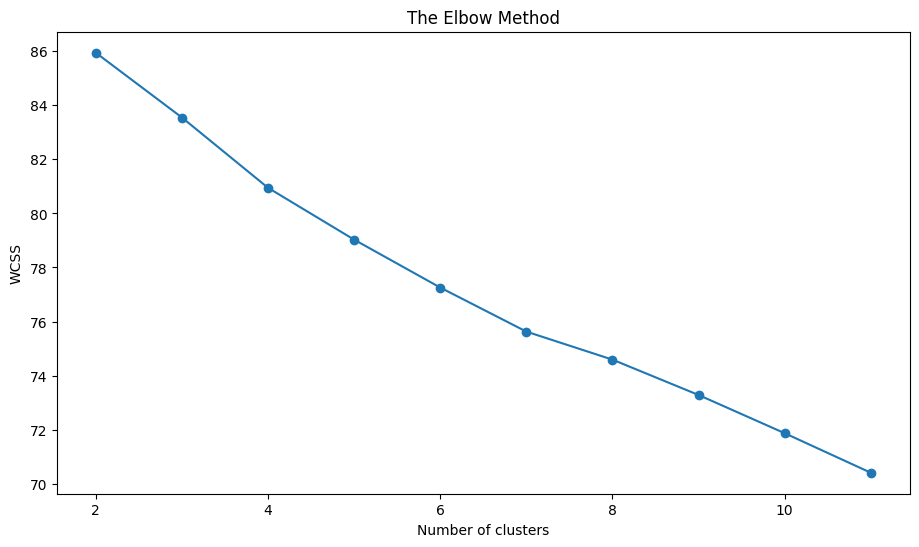

In [5]:
## ELBOW METHOD
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 101)
    kmeans.fit(tfidf_vects)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), wcss, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [6]:
#forming 6 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({3: 29, 5: 8, 0: 41, 2: 9, 4: 7, 1: 6})

In [7]:
# Show the top 10 keywords from each cluster
top_words = 10
# calculate the centroids
centroids = model.cluster_centers_.argsort()[:, ::-1]
for n in range(6):
    key_features = [names[i] for i in centroids[n, :top_words]]
    print('Cluster '+str(n+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['the', 'to', 'it', 'and', 'phone', 'is', 'for', 'of', 'that', 'my']
Cluster 2
Top Words: ['excelente', 'freedompop', 'flimsy', 'flip', 'fm', 'for', 'found', 'four', 'freeze', 'fixed']
Cluster 3
Top Words: ['this', 'great', 'it', 'phone', 'came', 'as', 'was', 'arabian', 'the', 'is']
Cluster 4
Top Words: ['it', 'phone', 'very', 'love', 'to', 'and', 'bad', 'well', 'the', 'this']
Cluster 5
Top Words: ['excellent', 'product', 'perfect', 'in', 'every', 'right', 'condition', 'way', 'recommend', 'all']
Cluster 6
Top Words: ['good', 'very', 'choice', 'condition', 'was', 'but', 'does', 'exactly', 'it', 'in']


In [8]:
# print the cluster centers
cc=model.cluster_centers_
cc

array([[0.00472173, 0.        , 0.00251817, ..., 0.0338841 , 0.        ,
        0.00855239],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01842761, 0.        ,
        0.        ],
       [0.02331403, 0.00511392, 0.        , ..., 0.02182092, 0.        ,
        0.00409859],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05187842,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
# run the DBSCAN algorithm
# import required libraries
!pip install gensim
!pip install numpy
import gensim
import numpy as np
reviews=[]
for i in df['Reviews']:
    reviews.append(str(i).split())
w2v_model=gensim.models.Word2Vec(reviews, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)



<ipython-input-12-35542e4a6c0c>:24: RuntimeWarning: invalid value encountered in divide
  vector /= count


In [13]:
from sklearn.cluster import DBSCAN
min = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def findNN(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 20 and dists[19] > dist):
            l = int(lower_bound(dists, dist))
            if l < 20 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[20]

vectors.shape

(100, 100)

In [20]:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append(compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

NameError: name 'compute200thnearestneighbour' is not defined

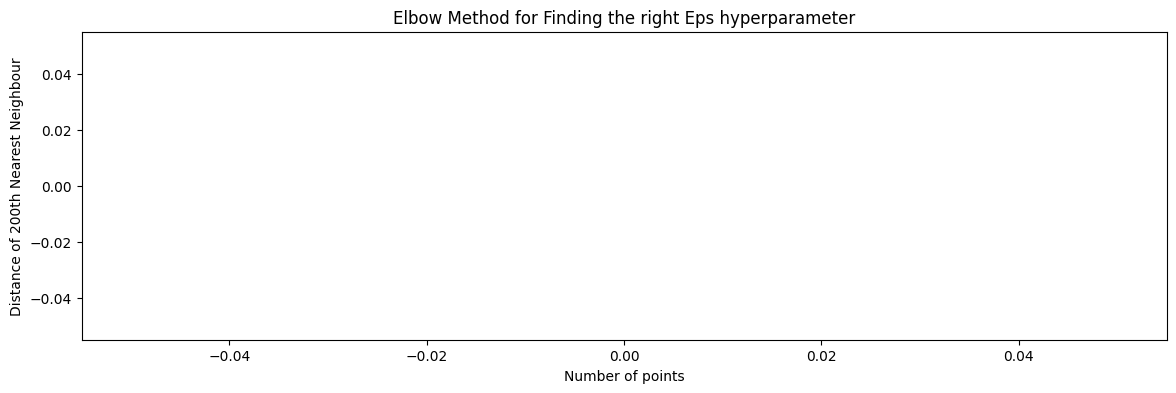

In [21]:

# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I feel working on different machine learning algorithms is a great experience. even thought its its challange but it is nice to learn on each ML algorithms and how they work





'''